<a href="https://colab.research.google.com/github/hyuntaedo/Data_Analysis/blob/main/Visualization_Rental_Info.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 타입에 따른 시각화 유형
 - 단일 변수
   - 수치형 : 확률분포 또는 히스토그램
   - 범주형 : 빈도수 그래프(Bar / PieChart)
 - 다 변수
   - Y:연속/X:연속 : 산점도/희귀그래프/히트맵
   - Y:연속/X:범주 : 막대그래프/상자그림
   - Y:연속/X:시간(순서) : 선그래프/포인트그래프

1. DDA : 묘사적 데이터 분석 -> Target(Y) / X : 시각화(신뢰성)

2. EDA : 탐색적 데이터 분석 -> Target(Y) <-> X1,X2,X3... Trend 분석(파악) -> 시각화 (변수간 분석, 다 변수)
3. CDA : 
4. PDA

 - Matpliot : 2003 MATLAB-인터페이스 기반 파이썬라이브러리 
   - 라이브러리를 쉽게 적용가능 
   - 디테일한 옵션 적용 가능 
 - Seaborn : Matplot기반 
   - 통계전용 시각화 
   - Pandas와 연계가 잘됨

In [44]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
from google.colab import files
upload = files.upload() 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns

In [3]:
fm._rebuild()

In [4]:
plt.rc('font', family='NanumGothic')

In [5]:
mpl.rc('font',family='NanumBarunGothic')

## Key Value : datetime

In [8]:
csv_df = pd.read_csv('Data03.csv')
csv_df.head()

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0


In [9]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

## 단일변수

In [10]:
csv_df['type_of_contract'].value_counts()

렌탈     46481
멤버십     4819
Name: type_of_contract, dtype: int64

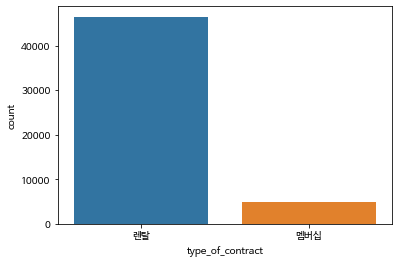

In [11]:
sns.countplot(data=csv_df,x='type_of_contract')

In [12]:
csv_df['product'].value_counts()

K1    39134
K2     8995
K3     2082
K5      645
K4      327
K6      120
Name: product, dtype: int64

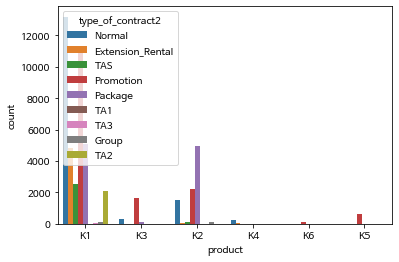

In [13]:
sns.countplot(data=csv_df,x='product',hue='type_of_contract2')

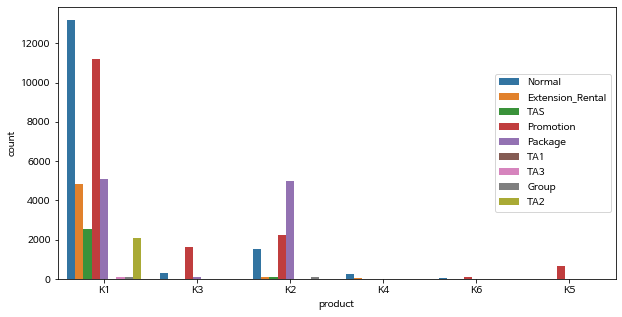

In [14]:
plt.figure(figsize=[10,5])
sns.countplot(data=csv_df,x='product',hue='type_of_contract2')
plt.legend(loc='right')
plt.savefig('img1.png')

## 연속형 범주

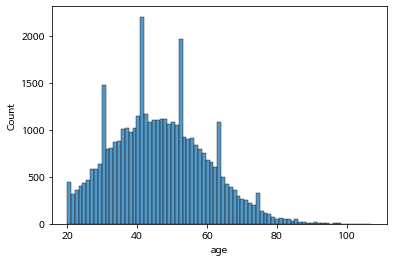

In [15]:
sns.histplot(data=csv_df,x='age')

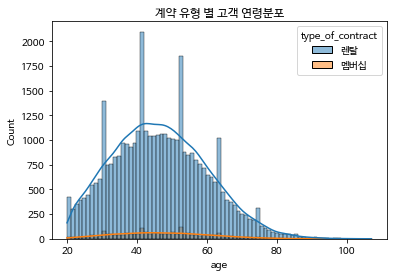

In [16]:
plt.title('계약 유형 별 고객 연령분포')
sns.histplot(data=csv_df,x='age',kde=True,hue='type_of_contract')

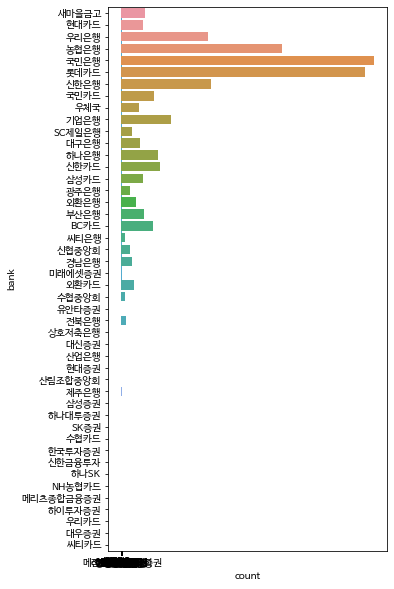

In [17]:
plt.figure(figsize=[5,10])
sns.countplot(data=csv_df,x='bank')
## 빈도수가 높은 순대로 나옴(sort)
sns.countplot(data=csv_df,y='bank')


In [18]:
order_list = csv_df['bank'].value_counts().index.tolist()

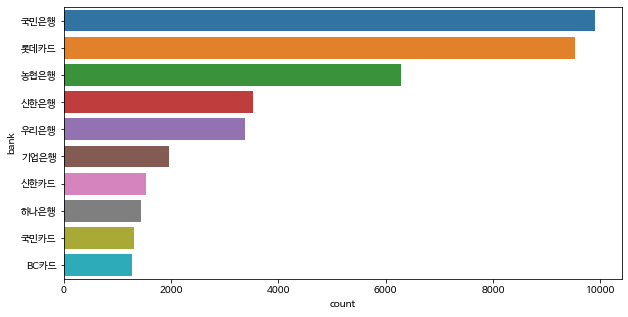

In [19]:
plt.figure(figsize=[10,5])
sns.countplot(data=csv_df,y='bank',order=order_list[0:10])

In [20]:
order_list[0:10]

['국민은행',
 '롯데카드',
 '농협은행',
 '신한은행',
 '우리은행',
 '기업은행',
 '신한카드',
 '하나은행',
 '국민카드',
 'BC카드']

In [21]:
csv_df2 = pd.read_csv('Data03.csv')
csv_df2.head()

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0


In [22]:
csv_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

## 다변수
 - X:연속/ Y:연속
  - 산점도
  - 회귀(선)분석
  - 상관분석

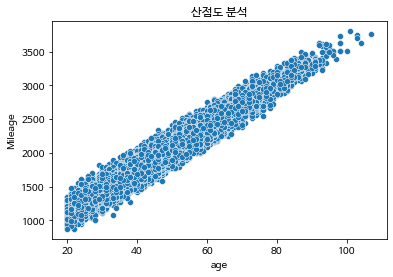

In [23]:
plt.title('산점도 분석')
sns.scatterplot(data=csv_df2,x='age',y='Mileage')

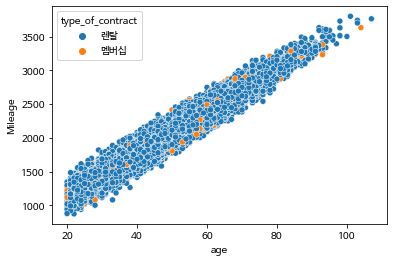

In [24]:
sns.scatterplot(data=csv_df2,x='age',y='Mileage',hue='type_of_contract')

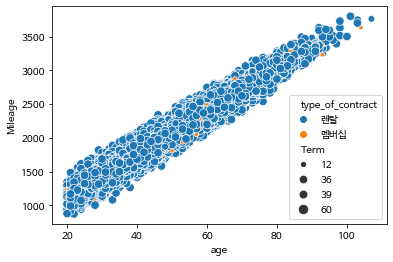

In [25]:
sns.scatterplot(data=csv_df2,x='age',y='Mileage',hue='type_of_contract',size='Term')

##회귀선(식)

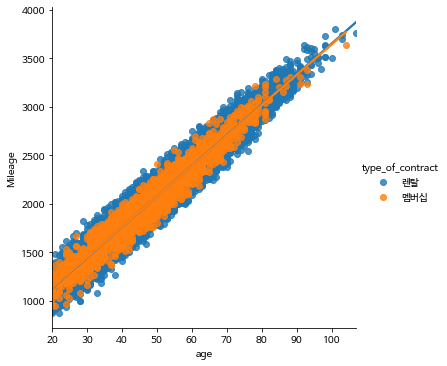

In [26]:
sns.lmplot(data=csv_df2,x='age',y='Mileage',hue='type_of_contract')

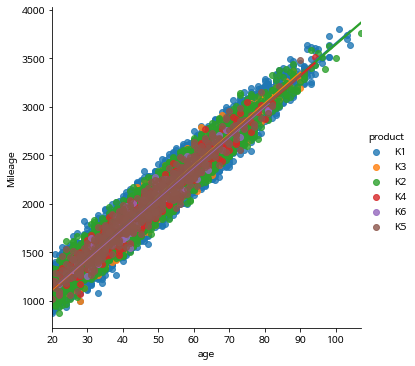

In [27]:
sns.lmplot(data=csv_df2,x='age',y='Mileage',hue='product')

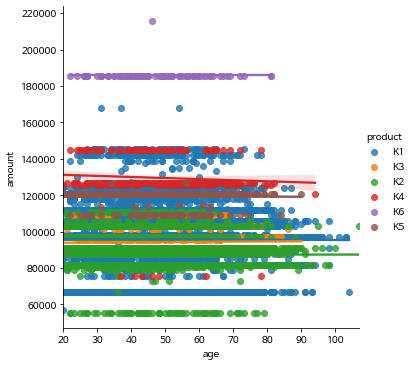

In [28]:
sns.lmplot(data=csv_df2,x='age',y='amount',hue='product')

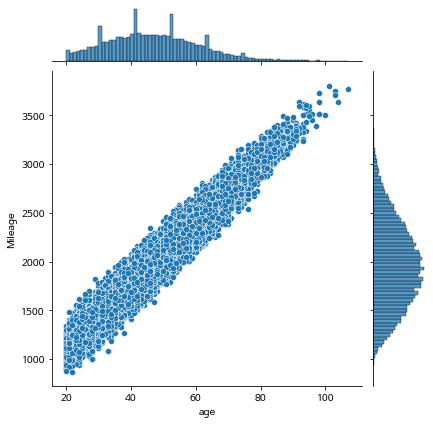

In [29]:
sns.jointplot(data=csv_df2,x='age',y='Mileage')

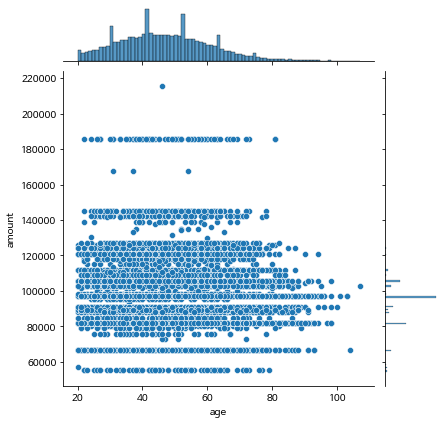

In [30]:
sns.jointplot(data=csv_df2,x='age',y='amount')

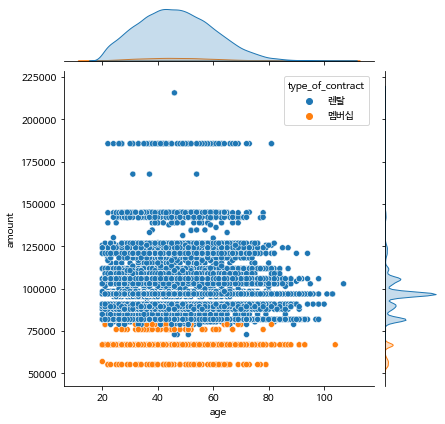

In [31]:
sns.jointplot(data=csv_df2,x='age',y='amount',hue='type_of_contract')

## 다 변수 분석 or 상관분석(co-relation)

In [32]:
csv_df2.corr()

,id,Term,amount,overdue_count,credit rating,age,Mileage
id,1.000000,0.018640,-0.162013,-0.011126,0.010875,0.000030,-0.000965
Term,0.018640,1.000000,0.465662,-0.013498,-0.042443,-0.008474,-0.007871
amount,-0.162013,0.465662,1.000000,0.075492,-0.017583,-0.003537,-0.004146
overdue_count,-0.011126,-0.013498,0.075492,1.000000,0.202012,-0.001720,-0.002637
credit rating,0.010875,-0.042443,-0.017583,0.202012,1.000000,0.004609,0.002921
age,0.000030,-0.008474,-0.003537,-0.001720,0.004609,1.000000,0.973281
Mileage,-0.000965,-0.007871,-0.004146,-0.002637,0.002921,0.973281,1.000000


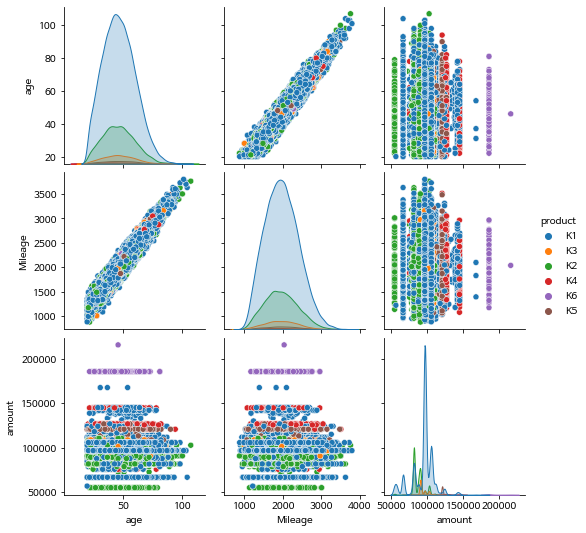

In [33]:
sns.pairplot(csv_df2[['age','Mileage','amount','product']],hue='product')

### X: 범주 / Y: 연속형
  - barplot/boxplot

In [ ]:
csv_df2.head()

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0


In [34]:
p1 = pd.pivot_table(data=csv_df2,index='channel',values='amount',aggfunc='sum')
top_list = p1.sort_values(by='amount',ascending=False).head(10).index.tolist()

In [ ]:
csv_df2['channel'].value_counts()

서비스 방문     15186
홈쇼핑/방송     12977
렌탈총판        5544
R관리방판       4727
하이마트        3227
영업방판        3039
렌탈재계약       2193
일반          1232
전자랜드        1205
R빌리미         560
이마트          265
홈플러스         225
R인터넷         198
R유통사         188
홈쇼핑/인터넷      177
R렌탈운영        120
R농협          119
R농협인터넷몰       83
R법인그룹         20
R법인           19
Name: channel, dtype: int64

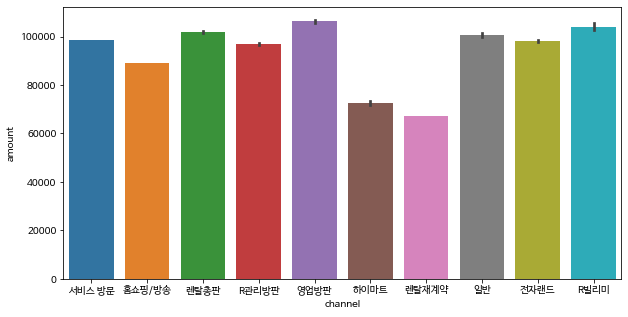

In [35]:
plt.figure(figsize=[10,5])
sns.barplot(data=csv_df2,x='channel',y='amount',order=top_list)

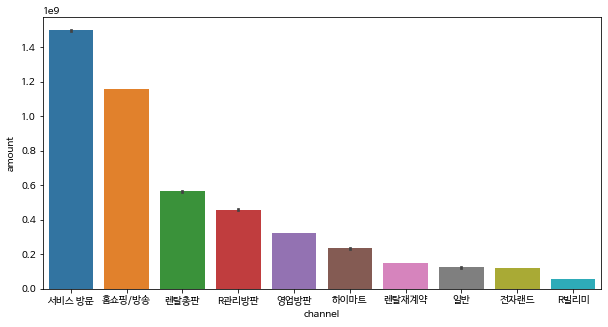

In [36]:
plt.figure(figsize=[10,5])
sns.barplot(data=csv_df2,x='channel',y='amount',order=top_list,estimator=sum)

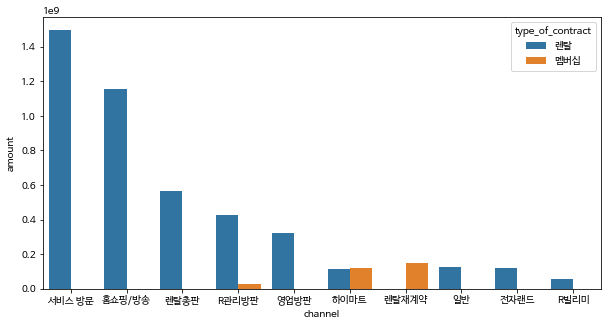

In [37]:
plt.figure(figsize=[10,5])
sns.barplot(data=csv_df2,x='channel',y='amount',order=top_list,estimator=sum,ci=None,hue='type_of_contract')

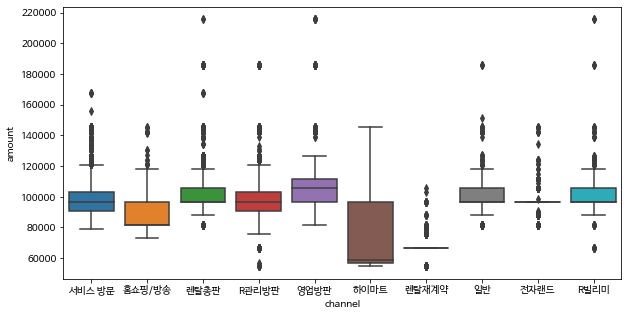

In [38]:
plt.figure(figsize=[10,5])
sns.boxplot(data=csv_df2,x='channel',y='amount',order=top_list)

%matplitlib
-> 매직명령어, jupytornotebook상에서 옵션을 바꿔 줄 때 사용

In [40]:
csv_df2['datetime(timestamp)'] = pd.to_datetime(csv_df2['datetime'])

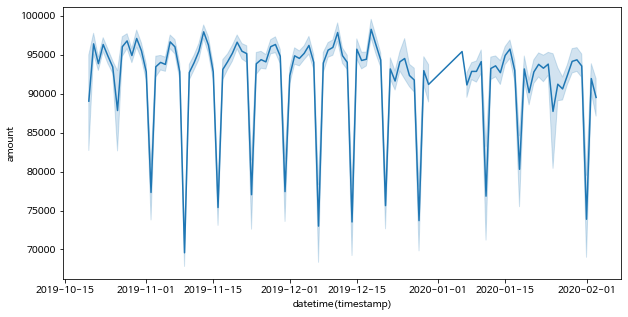

In [41]:
plt.figure(figsize=[10,5])
sns.lineplot(data=csv_df2,x='datetime(timestamp)',y='amount')